# NO SHOW ANALYSIS

## TABLE OF CONTENTS 
- [Introduction](#INTRODUCTION) 
- [Importing Libraries and Loading Dataframes](#IMPORTING-LIBRARIES-AND-LOAGING-DATAFRAMES)
- [Data Wrangling](#DATA-WRANGLING) 
- [Data Cleaning](#DATA-CLEANING) 
- [Data Analysis and Visualization](#DATA-ANALYSIS-AND-VISUALIZATION)
- [Conclusion](#CONCLUSION)

### INTRODUCTION 

A person makes a doctor's appointment, recieves all the instructions and doesn't show up for their appointment, WHO IS TO BLAME?

The dataset collects information from 100K medical appointments in Brazil and is focused on the question 'whether or not patient shows up for their appointments'. The dataset was gooten from kaggle.

**DATA DICTIONARY**

PatientId - Identification of a patient

AppointmentID - Identification of each appointment

Gender - Male or Female. Female is the greater proportion, woman takes more care of their health in comparison to men

ScheduledDay - The day someone called or registered for the appointment, this is before the apointment

AppointmentDay - The day of the actual appointment, when they have to visit the doctor

Age - How old is the patient

Neighbourhood - Where the appointment takes place

Scholarship - True or False (0 - false, 1 - true)

Hypertension - True or false

Diabetes - True or false

Alcoholism - True or false

Handicaped - True or false

SMS_recieved - True or false

No_show - Yes or No. No means the patient showed up on the appointment day and Yes means the patient did not show up

**KEY QUESTIONS THIS ANALYSIS WOULD BE ANSWERING**
1. Does gender have any impact on how patients show-up?

          - Does being diabetic affect how male/female show up?
     
          - Does being alcoholic affect how male/female show up?
     
          - Does being handicaped affect how male/female show up?
     
          - Does recieving SMS affect how male/female show up?
          
2. Does the increase in number of wait days affect how patients show up?

3. Does Age affect how patient shows up?

4. Which neighbourhood has the highest appearance rate

5. Does recieving SMS increase the chances of a patient showing up?

6. Does setting appointments on particular days increase the chances of a patient showing up?

7. Is there a relationship between the scheduled day and patient's absence?

### IMPORTING LIBRARIES AND LOADING DATAFRAMES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load the data

no_show_original = pd.read_csv('noshowappointment.csv')

In [3]:
# make a copy 

no_show_copy = no_show_original.copy()

In [4]:
# preview the dataframe

no_show_copy.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### DATA WRANGLING

In [5]:
no_show_copy.shape

(110527, 14)

In [6]:
no_show_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset isn't missing any value

In [7]:
# Checking for duplicate rows in the data set

sum(no_show_copy.duplicated())

0

There are no duplicate rows

In [8]:
no_show_copy.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### DATA CLEANING

First, the  PatientId and AppointmentID variables would not be necessary for this analysis, so their columns would both be dropped

In [9]:
# drop the 2 columns

no_show_copy.drop(['PatientId', 'AppointmentID'], inplace = True, axis = 1)

In [10]:
# verify that the two columns have been dropped

no_show_copy.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Correct the incorrect column names

In [11]:
# correct wrong names

no_show_copy.rename(columns = {'Hipertension': 'Hypertension', 'Handcap':'Handicap', 'No-show': 'No_show'}, inplace = True)

no_show_copy.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Change the datatypes to more appropriate ones

In [12]:
no_show_copy['ScheduledDay'] = pd.to_datetime(no_show_copy['ScheduledDay']).dt.date.astype('datetime64[ns]')
no_show_copy['AppointmentDay'] = pd.to_datetime(no_show_copy['AppointmentDay']).dt.date.astype('datetime64[ns]')
no_show_copy['Gender'] = no_show_copy['Gender'].astype("category")
no_show_copy['No_show'] = no_show_copy['No_show'].astype("category")

no_show_copy.dtypes

Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                 category
dtype: object

**Unique values in some variables**

In [13]:
# print unique values of some columns 
print("Unique Values in `Gender` => {}".format(no_show_copy.Gender.unique()))
print("Unique Values in `Age` => {}".format(no_show_copy.Age.unique()))
print("Unique Values in `Scholarship` => {}".format(no_show_copy.Scholarship.unique()))
print("Unique Values in `Hypertension` => {}".format(no_show_copy.Hypertension.unique()))
print("Unique Values in `Diabetes` => {}".format(no_show_copy.Diabetes.unique()))
print("Unique Values in `Alcoholism` => {}".format(no_show_copy.Alcoholism.unique()))
print("Unique Values in `Handicap` => {}".format(no_show_copy.Handicap.unique()))
print("Unique Values in `SMS_received` => {}".format(no_show_copy.SMS_received.unique()))
print("Unique Values in `No_show` => {}".format(no_show_copy.No_show.unique()))

Unique Values in `Gender` => ['F', 'M']
Categories (2, object): ['F', 'M']
Unique Values in `Age` => [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   0   3   1  69  68  60  67  36  10  35  20
  26  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75
  73  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90
  94  86  91  98  92  96  93  95  97 102 115 100  99  -1]
Unique Values in `Scholarship` => [0 1]
Unique Values in `Hypertension` => [1 0]
Unique Values in `Diabetes` => [0 1]
Unique Values in `Alcoholism` => [0 1]
Unique Values in `Handicap` => [0 1 2 3 4]
Unique Values in `SMS_received` => [0 1]
Unique Values in `No_show` => ['No', 'Yes']
Categories (2, object): ['No', 'Yes']


There is a strange unique value of '-1' in the Age column, I have to investigate and solve it.

In [14]:
#show the column(s) where the Age is '-1'

no_show_copy.query('Age == -1')


,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,2016-06-06,2016-06-06,-1,ROMÃO,0,0,0,0,0,0,No


There is only on row in which Age is '-1', this row will be dropped.

In [15]:
# drop the row

no_show_copy.drop(99832, inplace = True)

no_show_copy.shape

(110526, 12)

From the dataset's description on kaggle, it can be seen that Handicap column should have 2 distinct values (True and False which can be represented by 1 and 0 respectively), but from the unique values we can see that Handicap has 4 unique values. Let's check the distribution of these values

In [16]:
no_show_copy['Handicap'].value_counts()

0    108285
1      2042
2       183
3        13
4         3
Name: Handicap, dtype: int64

Now that we can see that '0' is a lot greater than the rest, it's safe to assume that '1, 2, 3 and 4' are different types of handicaps. We can group them together as one, being handicaped.

In [17]:
no_show_copy['Handicap'] = no_show_copy['Handicap'].apply(lambda x:0 if x == 0 else 1)

no_show_copy['Handicap'].value_counts()

0    108285
1      2241
Name: Handicap, dtype: int64

Therefore, True and False is equivalent to 1 and 0 respectively.

Determine whether there are any instances where the 'AppointmentDay' occurs before the 'ScheduledDay'.

In [18]:
no_show_copy[no_show_copy['AppointmentDay'] < no_show_copy['ScheduledDay']]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,Yes
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,Yes


In [19]:
# drop the rows where 'AppointmentDay' occurs before the 'ScheduledDay'.

rows_to_drop = [27033, 55226, 64175, 71533, 72362]

no_show_copy.drop(rows_to_drop, inplace = True)

In [20]:
# to confirm that the rows have been dropped

no_show_copy[no_show_copy['AppointmentDay'] < no_show_copy['ScheduledDay']]

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show


Now, I'll introduce a new column (Waiting_days). This would tell us the number of days the patient had to wait after the scheduled day for the appointment day. The aim is to know if there is a trend of them showing up on time (or not) if the number of days they have to wait is too long.

In [21]:
# create a column for Waiting_days

no_show_copy['Waiting_days'] = (no_show_copy['AppointmentDay'] - no_show_copy['ScheduledDay']).dt.days.astype(int)

no_show_copy.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_days
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0


In [22]:
no_show_copy.dtypes

Gender                  category
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                 category
Waiting_days               int32
dtype: object

In [23]:
# to confirm there aren't irregularities in the 'WaitDays'.

no_show_copy.query('Waiting_days < 0')

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_days


A new column, 'Appointment_Weekday' would also be created, this column would contain the days of the Week which the appointment were held. This would help in our analysis. 

In [24]:
#create a column for appointment day of the week 

no_show_copy['Appointment_Weekday'] = no_show_copy['AppointmentDay'].dt.day_name()

In [25]:
no_show_copy.head(5)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_days,Appointment_Weekday
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0,Friday
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0,Friday
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0,Friday
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0,Friday
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0,Friday


In [26]:
# to check the unique values in the 'Appointment_Weekday'

no_show_copy['Appointment_Weekday'].unique()

array(['Friday', 'Tuesday', 'Monday', 'Wednesday', 'Thursday', 'Saturday'],
      dtype=object)

### DATA ANALYSIS AND VISUALIZATION

**QUESTION 1: Does gender have any impact on how patients show up?**

First, let's look at the percentage of male to female to avoid being biased in our analysis

In [27]:
# Male ratio

Male_count = len(no_show_copy[no_show_copy['Gender'] == 'M'])
Male_total = len(no_show_copy)
Male_percent = (Male_count / Male_total) * 100

print(Male_percent)

35.00239773436722


In [28]:
# Female ratio

Female_count = len(no_show_copy[no_show_copy['Gender'] == 'F'])
Female_total = len(no_show_copy)
Female_percent = (Female_count / Female_total) * 100

print(Female_percent)

64.99760226563278


In [29]:
print("Percent of Male Patients` => {:.2f}%".format(Male_percent))
print("Percent of Female Patients` => {:.2f}%".format(Female_percent))

Percent of Male Patients` => 35.00%
Percent of Female Patients` => 65.00%


The number of females are a lot higher than that of males. So we have to take that into consideration during the analysis


Let's check the patients present and absent from their appointment (Yes and No respectively)

<AxesSubplot:xlabel='No_show', ylabel='count'>

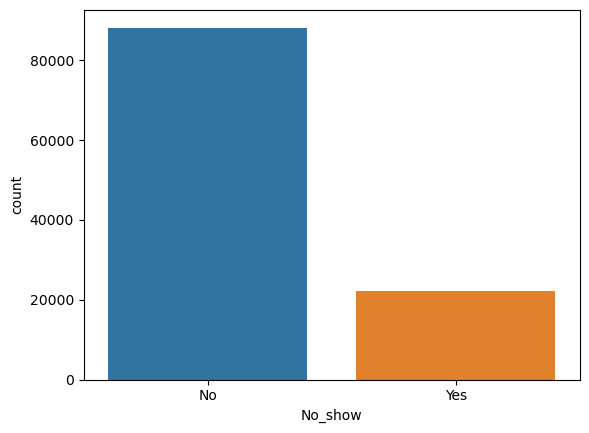

In [30]:
sns.countplot(x = 'No_show', data = no_show_copy)

Now, let's see the ratio of Males and Females that showed up for their appointment to the ones that did not.

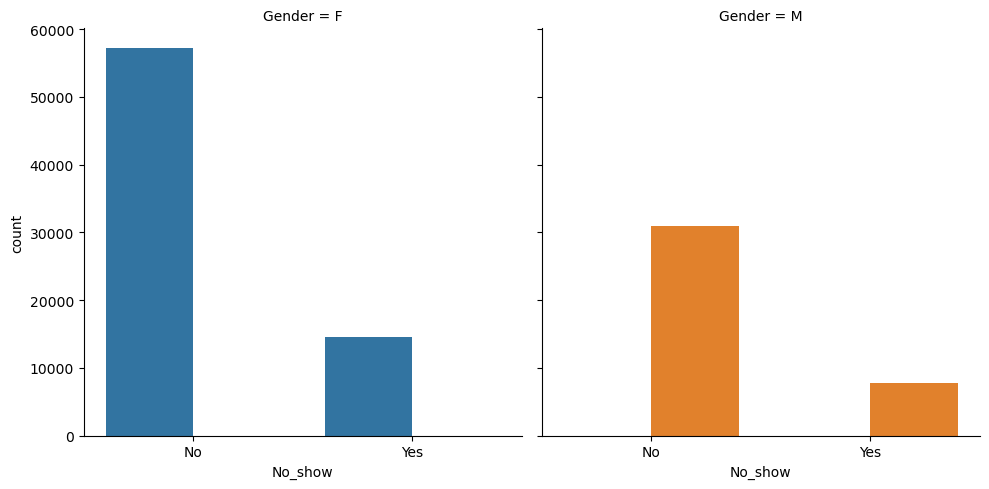

In [31]:
# now for male and female

sns.catplot(x = 'No_show', data = no_show_copy, hue = 'Gender', col = 'Gender', kind = 'count')

From the visualization, the ratio of females that showed up for their appointment compared to the total number of females isn't significantly different from the ratio of males that showed up for their appointment compared to the total number of males.

***Does being diabetic affect how male/female show up?***

In [32]:
# Before we can do this, we have to change the format of the No_show column

labels = {"No": 1, "Yes":0}
no_show_copy["No_show"] = no_show_copy["No_show"].map(labels)

# Now, let's change the datatype to integer
no_show_copy["No_show"] = no_show_copy["No_show"].astype(int)

In [33]:
# Diabetes Impact

gender_diabetes_impact = pd.pivot_table(data = no_show_copy, index = ["Gender", "Diabetes"], 
                                        values = 'No_show')
round(gender_diabetes_impact * 100, 2)

No_show
Gender Diabetes         
F      0           79.50
       1           81.86
M      0           79.89
       1           82.33

***Does being an alcoholic affect how male/female show up?***

In [34]:
# Alcoholism Impact

gender_alcoholism_impact = pd.pivot_table(data = no_show_copy, index = ['Gender', 'Alcoholism'], values = 'No_show')
round(gender_alcoholism_impact * 100, 2)

No_show
Gender Alcoholism         
F      0             79.77
       1             74.82
M      0             79.88
       1             82.73

***Does being a handicap affect how male/female show up?***

In [35]:
# Handicap Impact

gender_handicap_impact = pd.pivot_table(data = no_show_copy, index = ['Gender', 'Handicap'], values = 'No_show')
round(gender_handicap_impact * 100, 2)

No_show
Gender Handicap         
F      0           79.66
       1           81.23
M      0           79.97
       1           82.84

***Does receiving SMS affect how male/female show up?***

In [36]:
# SMS Impact

gender_sms_impact = pd.pivot_table(data = no_show_copy, index = ['Gender', 'SMS_received'], values = 'No_show')
round(gender_sms_impact * 100, 2)

No_show
Gender SMS_received         
F      0               83.48
       1               72.23
M      0               83.00
       1               72.84

**QUESTION 2: Does the increase in number of wait days affect how patients show up?**

In [37]:
no_show_copy["WaitDays_bins"] = pd.cut(no_show_copy['Waiting_days'], 10, labels = ["0-20", "21-40", "41-60", "61-80", "81-100", "101-120", "121-140", "141-160", "161-180", "181-200"])

no_show_copy.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_days,Appointment_Weekday,WaitDays_bins
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,0-20
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,0-20
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,0-20


In [38]:
# Defining a function for plots without ticks

def plotting_3(x, titlename):
    gen_3 = sns.countplot(x, hue = no_show_copy.No_show, data = no_show_copy)
    gen_3.set_title(titlename)
    plt.show()
    return gen_3

C:\Users\emmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


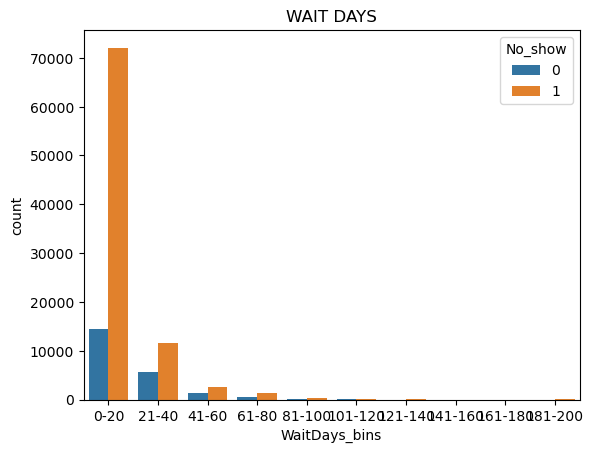

<AxesSubplot:title={'center':'WAIT DAYS'}, xlabel='WaitDays_bins', ylabel='count'>

In [39]:
plotting_3(x = 'WaitDays_bins', titlename = "WAIT DAYS")

**QUESTION 3: Does Age affect how patient shows up?**

In [40]:
#create Age bins for this analysis

no_show_copy["Age_bins"] = pd.qcut(no_show_copy.Age, 5, labels = ["0 - 18", "19 - 40", "41 - 60", "61 - 90", "91 - 120"])

no_show_copy.head(3)

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show,Waiting_days,Appointment_Weekday,WaitDays_bins,Age_bins
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,0,Friday,0-20,91 - 120
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,1,0,Friday,0-20,61 - 90
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,1,0,Friday,0-20,91 - 120


C:\Users\emmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


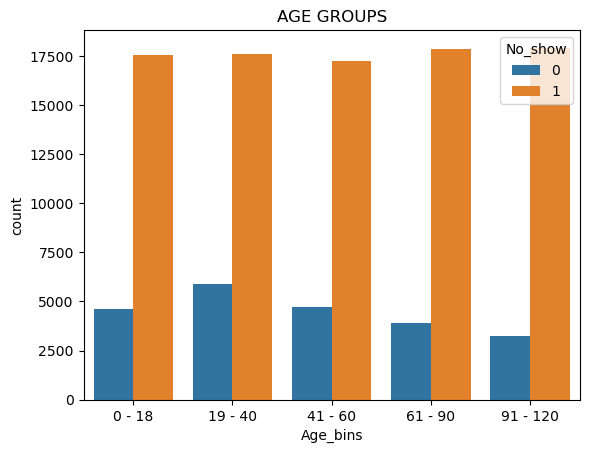

<AxesSubplot:title={'center':'AGE GROUPS'}, xlabel='Age_bins', ylabel='count'>

In [41]:
#we'll do this by using the function we defined earlier

plotting_3(x = 'Age_bins', titlename = "AGE GROUPS")

From this, we can see that more people within the ages of 13-29 miss their appointments as compared to the other age groups `

**QUESTION 4: Which neighbourhood has the highest appearance rate**

In [42]:
neighbourhood = pd.pivot_table(data = no_show_copy, index = ["Neighbourhood"], values = "No_show")
result = neighbourhood.sort_values(('No_show'), ascending=False).head(3)
round(result * 100, 2)

,No_show
Neighbourhood,
PARQUE INDUSTRIAL,100.00
ILHA DO BOI,91.43
AEROPORTO,87.50


PARQUE INDUSTRIAL has a 100% attandance rate.

**QUESTION 5: Does receiving SMS increase the chances of a patient showing up?**

In [43]:
# creating new variables for sms received and sms not received to classify the data into 2 categories

sms_received = no_show_copy.SMS_received == 1
sms_not_received = no_show_copy.SMS_received == 0

In [44]:
# proportion of sms received and sms not received

no_show_copy[sms_received].shape[0] / no_show_copy.shape[0], no_show_copy[sms_not_received].shape[0] / no_show_copy.shape[0]

(0.3210430596900137, 0.6789569403099863)

In [45]:
# checking for the accuracy of proportions

no_show_copy[sms_received].shape[0] + no_show_copy[sms_not_received].shape[0] == no_show_copy.shape[0]

True

In [46]:
#defining a function for all plots with tick labels

def plotting(x, titlename):
    gen = sns.countplot(x, hue = no_show_copy.No_show, data = no_show_copy)
    gen.set_title(titlename)
    gen.set_xticklabels(x_ticks_labels)
    plt.show()
    return gen

C:\Users\emmad\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


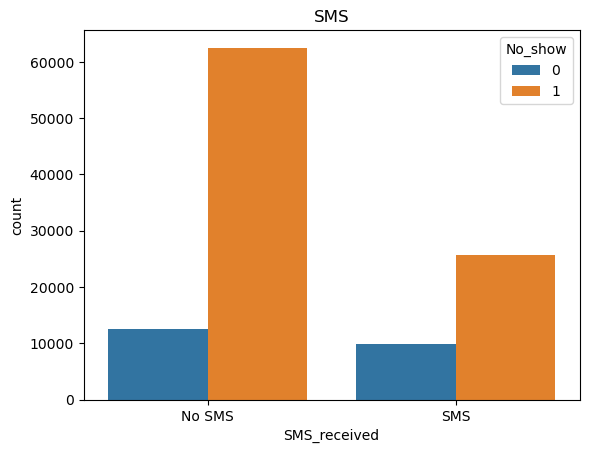

<AxesSubplot:title={'center':'SMS'}, xlabel='SMS_received', ylabel='count'>

In [47]:
x_ticks_labels=['No SMS', 'SMS']

plotting(no_show_copy.SMS_received, "SMS")

**QUESTION 6: Does setting appointments on particular days increase the chances of a patient showing up?**

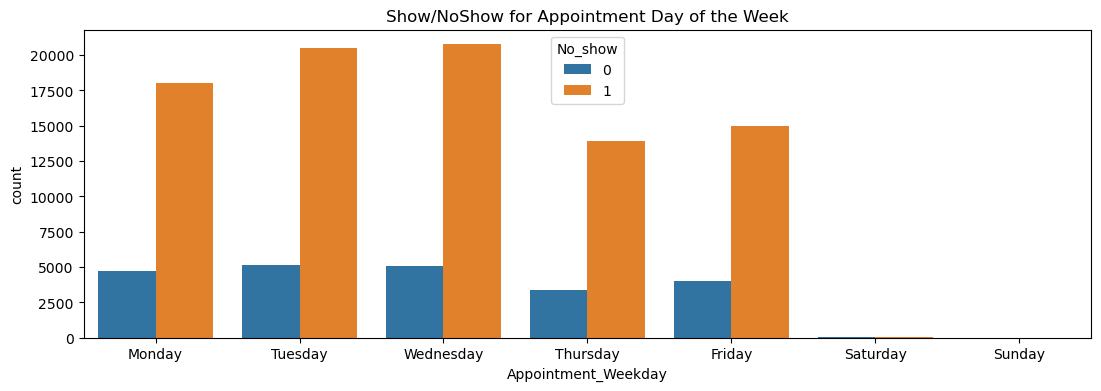

In [48]:
orderly = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

plt.figure(figsize=(13,4))
appo = sns.countplot(x = no_show_copy.Appointment_Weekday, hue = no_show_copy.No_show, order = orderly)
appo.set_title("Show/NoShow for Appointment Day of the Week")
plt.show()

Very little amount of appointments were booked for Saturday and Sunday. Apart from this, the days of the week does not affect the rate of show-up

**QUESTION 7: Is there a relationship between Scheduled Day and patient's absence**

<AxesSubplot:xlabel='ScheduledDay', ylabel='No_show'>

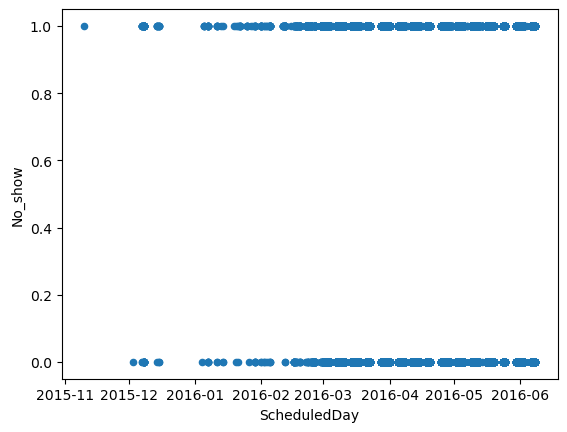

In [49]:
no_show_copy.plot(x = 'ScheduledDay', y = 'No_show', kind = 'scatter')

No relationship between Scheduled day and patient's absence.

### CONCLUSION

- Gender has no impact on if a patient shows up for their appointment or not.

- The number of wait days potentially affects how patients show up for their appointments.

- Patients within the ages of 19-14 miss their appointments more than patients within other age groups. 

- PARQUE INDUSTRIAL has a 100% attandance rate.

- Considering the significantly larger number of individuals who did not receive SMS messages compared to those who did, it can be inferred that patients are less likely to attend their appointments when they are sent SMS reminders as opposed to when no SMS reminders are sent.

- With the exception of a minimal number of appointments scheduled for Saturday and Sunday, the specific day of the week does not seem to influence the rate of attendance for appointments.

- No relationship between Scheduled day and patient's absence. 